# Getting data from NOAA webpage

In [2]:
!wget -O land_global_temperature_anomaly-1880-2015 https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

--2017-01-04 13:27:57--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolviendo www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.172, 205.167.25.171, 2610:20:8040:2::172, ...
Conectando con www.ncdc.noaa.gov (www.ncdc.noaa.gov)[205.167.25.172]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/plain]
Grabando a: “land_global_temperature_anomaly-1880-2015”

    [ <=>                                   ] 23.796       133KB/s   en 0,2s   

2017-01-04 13:27:58 (133 KB/s) - “land_global_temperature_anomaly-1880-2015” guardado [23796]



In [3]:
import numpy

In [4]:
!head land_global_temperature_anomaly-1880-2015

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [5]:
numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2015', delimiter=',',skiprows=4)

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

In [6]:
T_land = numpy.loadtxt(fname='land_global_temperature_anomaly-1880-2015', delimiter=',',skiprows=4)

In [7]:
print(T_land)

[[  1.88001000e+05  -1.53800000e-01]
 [  1.88002000e+05  -5.77100000e-01]
 [  1.88003000e+05  -7.25000000e-01]
 ..., 
 [  2.01510000e+05   1.32120000e+00]
 [  2.01511000e+05   1.28280000e+00]
 [  2.01512000e+05   1.87220000e+00]]


In [8]:
numpy.shape(T_land)

(1632, 2)

In [9]:
T_land.shape

(1632, 2)

In [10]:
1632/12

136.0

In [12]:
from matplotlib import pyplot
%matplotlib inline

In [13]:
T_land[0]

array([  1.88001000e+05,  -1.53800000e-01])

In [14]:
T_land[:,1]

array([-0.1538, -0.5771, -0.725 , ...,  1.3212,  1.2828,  1.8722])

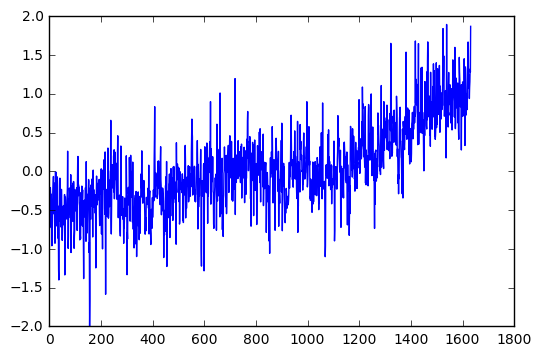

In [15]:
pyplot.plot(T_land[:,1])

In [ ]:
#Remember that to remove the ugly line at the beginning of the plot
#we use a ; at the end of the command

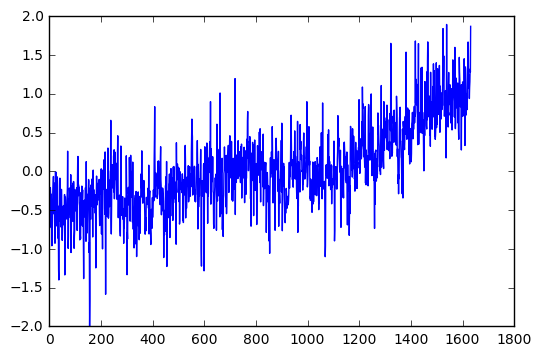

In [16]:
pyplot.plot(T_land[:,1]);

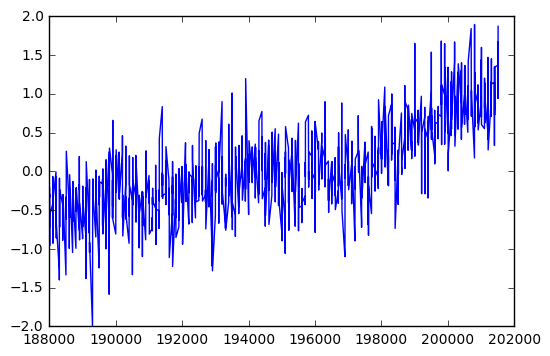

In [18]:
pyplot.plot(T_land[:,0] ,T_land[:,1]);

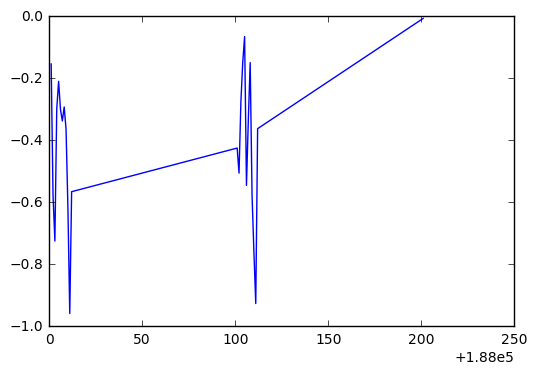

In [19]:
pyplot.plot(T_land[0:25,0] ,T_land[0:25,1]);

# Using  'numpy.arange()' for creating our data array

In [27]:
date = numpy.arange('1880', '2016', dtype=('datetime64[M]'))

In [28]:
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [29]:
len(date)

1632

In [31]:
dummy = numpy.linspace(1,1632, 1632)

In [32]:
print(dummy)

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.63000000e+03
   1.63100000e+03   1.63200000e+03]


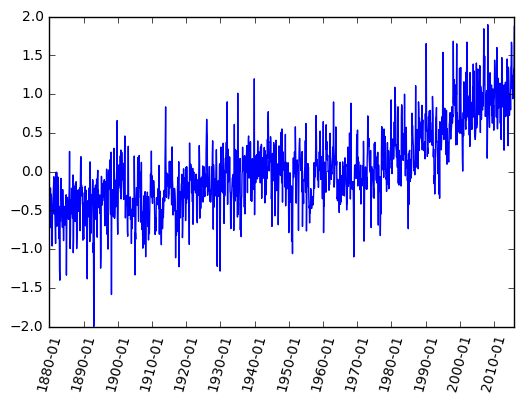

In [33]:
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:, 1]);
#notation: start:stop:step

In [ ]:
from matplotlib import rcParams
rcParams ['font.family'] = 'serif'
rcParams['font.sixe'] = 18

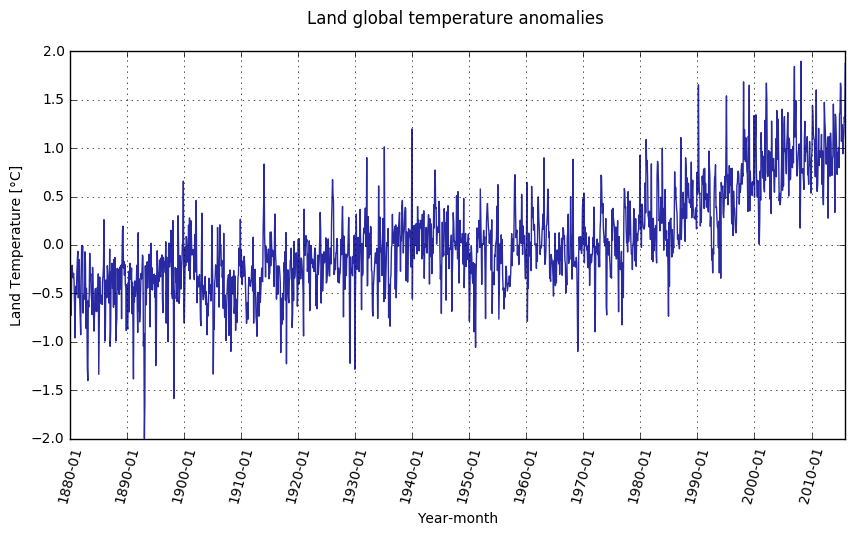

In [36]:
pyplot.figure(figsize=(10,5))
pyplot.xticks(dummy[::12*10], date[::12*10], rotation=75)
pyplot.plot(dummy, T_land[:, 1], color= '#2929a3', linestyle='-', linewidth=1)
# number in color taken from a HTML color page
pyplot.title('Land global temperature anomalies \n')
pyplot.xlabel('Year-month')
pyplot.ylabel('Land Temperature [°C]')
pyplot.grid()
pyplot.savefig('temp_anomalies.pdf');

# Histograms

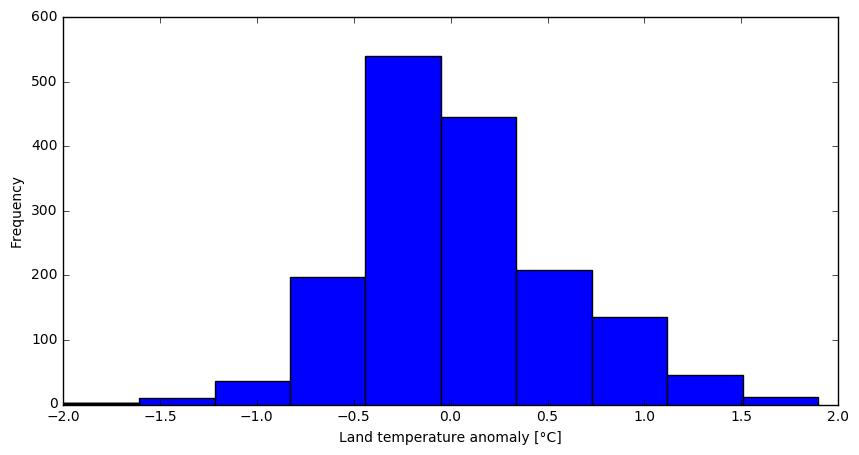

In [43]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1])
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Frequency');

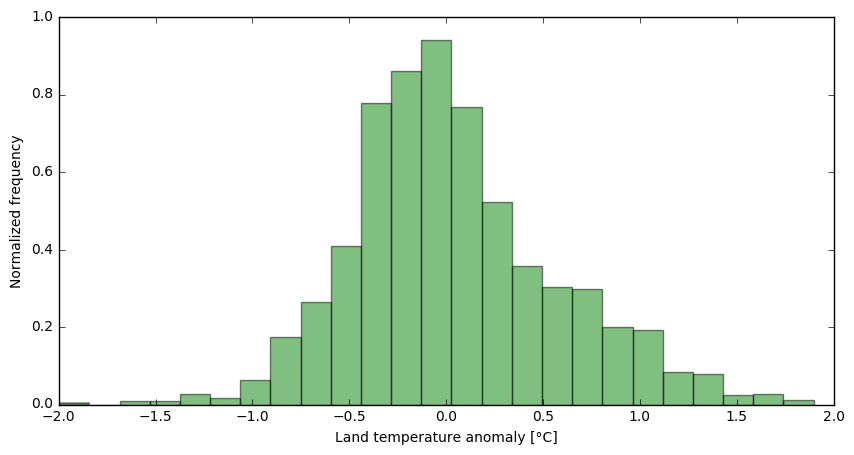

In [44]:
pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], 25, normed=True, color='g', alpha=0.5)
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency');

# Lets do some stats

In [46]:
mean_T = numpy.mean(T_land[:,1])
median_T = numpy.median(T_land[:,1])

print('The mean value is {:.5} and the median {:.5}'.format(mean_T,
                                                            median_T))


The mean value is 0.04031 and the median -0.0276


In [47]:
variance_T = numpy.var(T_land[:,1])
sigma_T = numpy.sqrt(variance_T)
print('The variance is {:.5} and the standard deviation {:.5}'.format(variance_T,
                                                                      sigma_T))


The variance is 0.28041 and the standard deviation 0.52954


In [42]:
from scipy import stats

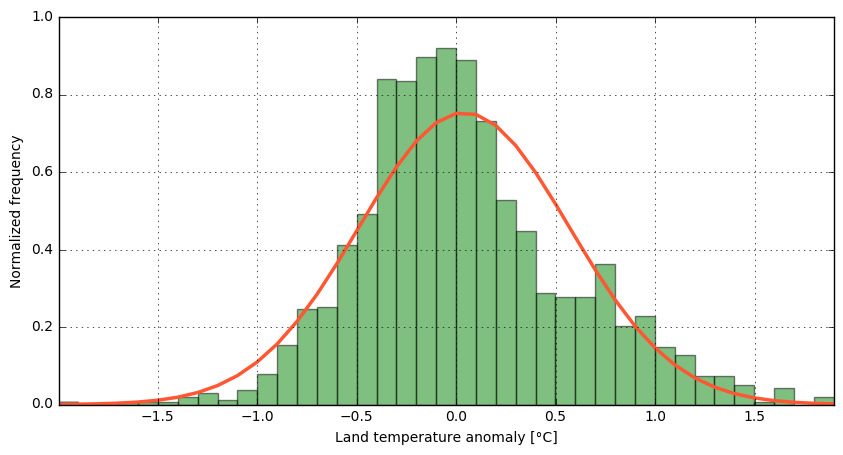

In [48]:
bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)

pyplot.figure(figsize=(10,5))
pyplot.hist(T_land[:,1], bins, normed=True, facecolor='g', alpha=0.5)
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', ls='-', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();


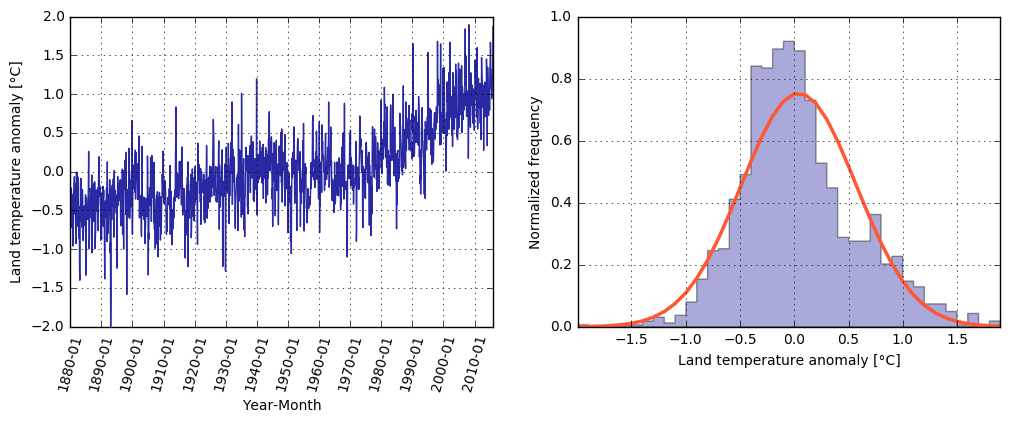

In [49]:
pyplot.figure(figsize=(12,4))  

pyplot.subplot(121)   # creates a grid of 1 row, 2 columns and 
                      # selects the first plot

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy,T_land[:,1], color='#2929a3', ls='-', lw=1) 
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid()

pyplot.subplot(122)            # prepares for the second plot

bins = numpy.linspace(min(T_land[:,1]), max(T_land[:,1]), 40)
pyplot.hist(T_land[:,1], bins, normed=True, color='#2929a3',
            alpha=0.4, histtype= 'stepfilled')
pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T),
            color='#ff5733', ls='-', lw=2.5)
pyplot.xlim(min(T_land[:,1]), max(T_land[:,1]))
pyplot.xlabel('Land temperature anomaly [°C]')
pyplot.ylabel('Normalized frequency')
pyplot.grid();

# Smooth the Data

In [51]:
def smooth_data(N, data):
    """
    Returns smoothed data using a sliding_moving avarage.

    Arguments:
    ----------
    N (int)       : amount of data values we want to average.
    data (array)  : array of data we want to smooth.


    Returns:
    --------
    smooth (array): array with smoothed data.
    """

    window = numpy.ones(N)/N
    smooth = numpy.convolve(data, window, 'same')

    return smooth

In [52]:
?smooth_data

In [53]:
smooth = smooth_data(12, T_land[:,1])

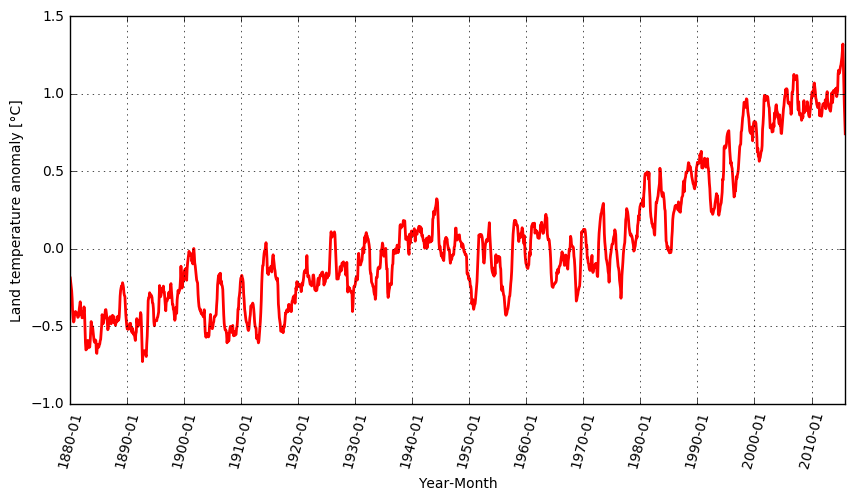

In [54]:
pyplot.figure(figsize=(10, 5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, smooth, color='r', ls='-', lw=2)

pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid(); 

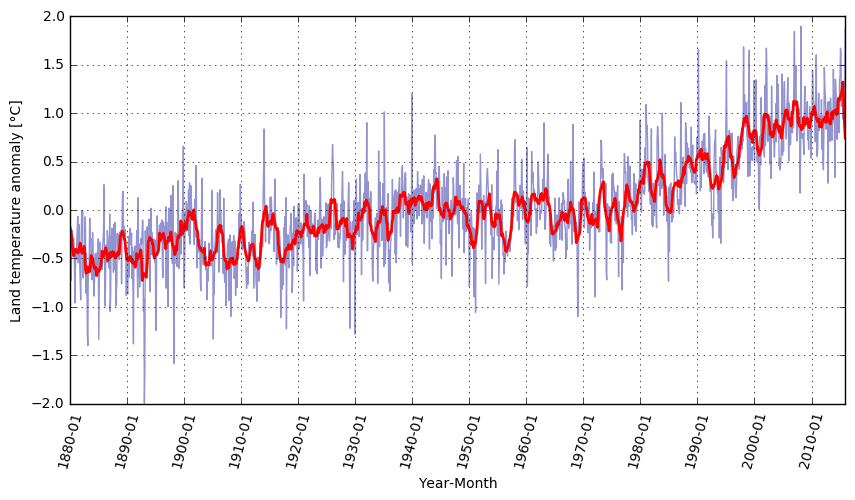

In [55]:
pyplot.figure(figsize=(10, 5))
pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', ls='-', lw=1, alpha=0.5) 
pyplot.plot(dummy, smooth, color='r', ls='-', lw=2)

pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid(); 

# Linear regression

In [56]:
m, b = numpy.polyfit(dummy, T_land[:,1], 1)
# the number '1' at the end corresponds to the order of the polynomial

f_linear = numpy.poly1d((m, b)) 


In [57]:
print(f_linear)

 
0.0008322 x - 0.6392


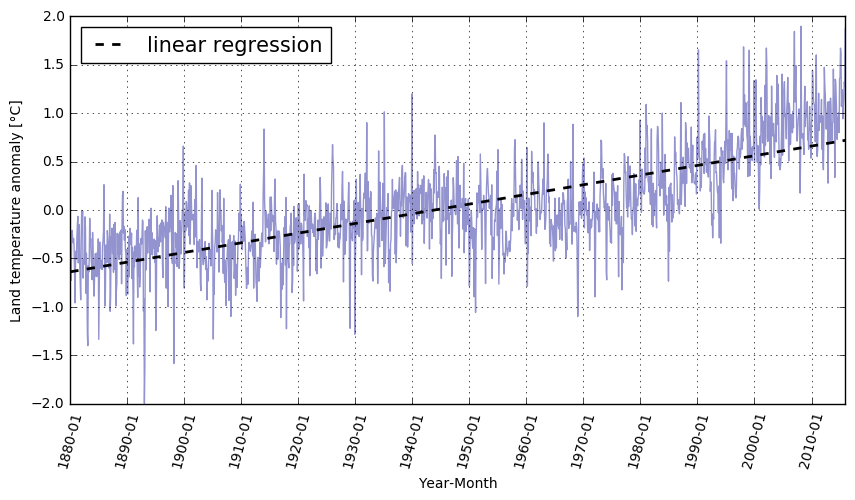

In [58]:
pyplot.figure(figsize=(10, 5))

pyplot.xticks(dummy[::12*10], date[::12*10] , rotation=75)   
pyplot.plot(dummy, T_land[:,1], color='#2929a3', ls='-', lw=1, alpha=0.5) 
pyplot.plot(dummy, f_linear(dummy), 'k--', linewidth=2,
            label='linear regression')
pyplot.xlabel('Year-Month')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();